<a href="https://colab.research.google.com/github/abhijith789/Object-Recognition-using-ResNet50-CIFAR-10-/blob/main/CIFAR_10_Object_recognition_usingResnet50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install kaggle

In [4]:
# Configure path of json file

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle competitions download -c cifar-10

 98% 704M/715M [00:06<00:00, 133MB/s]
100% 715M/715M [00:06<00:00, 107MB/s]


In [5]:
!ls

kaggle.json  sample_data


In [7]:
# Extract the cifar-10.zip
from zipfile import ZipFile
file_name = "cifar-10.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Extraction completed')

Extraction completed


In [8]:
!ls

cifar-10.zip  kaggle.json  sample_data	sampleSubmission.csv  test.7z  train.7z  trainLabels.csv


In [9]:
#Install dependecies for extract 7z file
!pip install py7zr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.9/67.9 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 41.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.2/96.2 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.6/50.6 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 69.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.3/141.3 kB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.7/413.7 kB 38.4 MB/s eta 0:00:00


In [10]:
# Extract the 7z file
import py7zr

archive = py7zr.SevenZipFile('train.7z', mode='r')
archive.extractall()
archive.close()

In [11]:
!ls

cifar-10.zip  sample_data	    test.7z  train.7z
kaggle.json   sampleSubmission.csv  train    trainLabels.csv


# **Import the dependencies**

In [12]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split

In [13]:
file_names = os.listdir('/content/train')

In [14]:
print(f"File type is :{type(file_names)}")
print(f"File length is :{len(file_names)}")

File type is :<class 'list'>
File length is :50000


In [15]:
print(file_names[0:7])

['39332.png', '19922.png', '37962.png', '46820.png', '39059.png', '22964.png', '6272.png']


# **Process the labels**

In [16]:
labels_df = pd.read_csv('/content/trainLabels.csv')

In [17]:
labels_df.shape

(50000, 2)

In [18]:
labels_df.head(10)

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile
5,6,automobile
6,7,bird
7,8,horse
8,9,ship
9,10,cat


In [19]:
labels_df.tail(10)

,id,label
49990,49991,deer
49991,49992,bird
49992,49993,airplane
49993,49994,automobile
49994,49995,airplane
49995,49996,bird
49996,49997,frog
49997,49998,truck
49998,49999,automobile
49999,50000,automobile


**label IDs are in order**

In [20]:
labels_df['label'].unique()

array(['frog', 'truck', 'deer', 'automobile', 'bird', 'horse', 'ship',
       'cat', 'dog', 'airplane'], dtype=object)

**Found 10 class**

In [21]:
import seaborn as sns

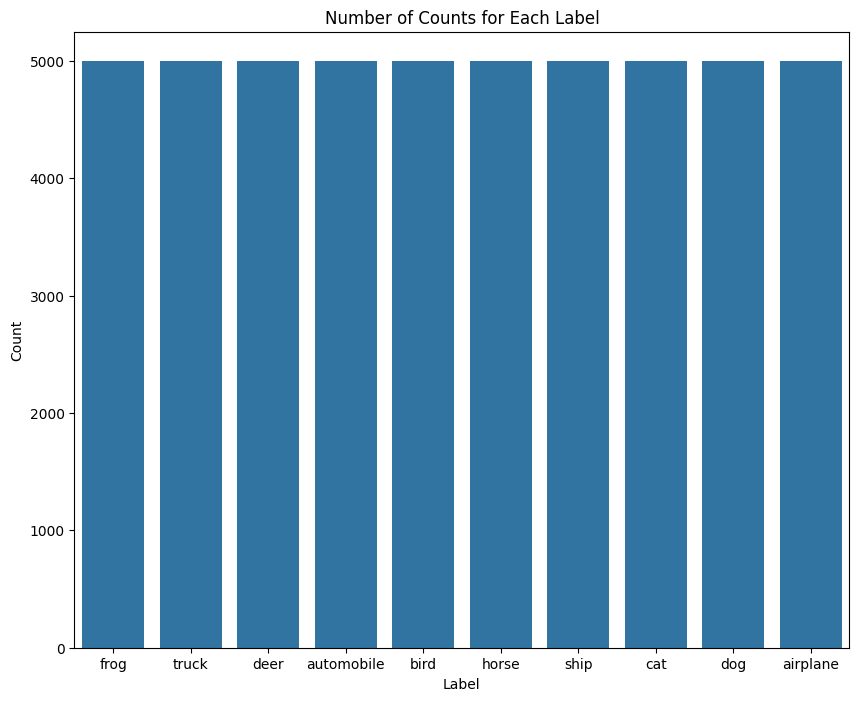

In [22]:
# Display the counts of each class
plt.figure(figsize=(10,8))
sns.countplot(data=labels_df, x='label', order=labels_df['label'].value_counts().index)
plt.title('Number of Counts for Each Label')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

In [23]:
labels_df['label'].value_counts()

,count
label,
frog,5000
truck,5000
deer,5000
automobile,5000
bird,5000
horse,5000
ship,5000
cat,5000
dog,5000


**Classes are in equal distribution**

**Labelling using dictionary**

In [24]:
# Creating dictionary
label__dict = {'frog':0,'truck':1,'deer':2,'automobile':3,'bird':4,'horse':5,'ship':6,'cat':7,'dog':8,'airplane':9}

labels = [label__dict[i] for i in labels_df["label"]]

In [25]:
print(f"Type of labels is :{type(labels)}")

Type of labels is :<class 'list'>


In [26]:
print(labels[0:5])

[0, 1, 1, 2, 3]


In [27]:
labels_df["label"][0:5]

,label
0,frog
1,truck
2,truck
3,deer
4,automobile


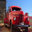

          id  label
37961  37962  truck


In [28]:
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/train/37962.png')
cv2_imshow(img)
print(labels_df[labels_df['id'] == 37962])

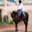

    id  label
11  12  horse


In [29]:
img = cv2.imread('/content/train/12.png')
cv2_imshow(img)
print(labels_df[labels_df['id'] == 12])

In [30]:
id_list = labels_df['id']
print (id_list[0:5])
print (id_list[-5:])

0    1
1    2
2    3
3    4
4    5
Name: id, dtype: int64
49995    49996
49996    49997
49997    49998
49998    49999
49999    50000
Name: id, dtype: int64


# **Image processing**

- Create a list and pass all the id numbers from the id_list
- Add '.png' to every numbers
- Purpose is to order the images by their id

In [31]:
# Convert images into numpy array

train_data_folder = '/content/train/'
data = []

for id in id_list:
  image = Image.open(train_data_folder + str(id) + '.png')
  image = np.array(image)
  data.append(image)

In [32]:
len(data)

50000

In [33]:
type(data)

list

In [34]:
type(data[0])

numpy.ndarray

In [35]:
(data[0]).shape

(32, 32, 3)

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
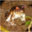

In [36]:
data[0]

In [37]:
labels[0:5]

[0, 1, 1, 2, 3]

In [38]:
# Convert image list and labels list to numpy arrays
X = np.array(data)
y = np.array(labels)

In [39]:
type(X)

numpy.ndarray

In [40]:
print(X.shape)
print(y.shape)

(50000, 32, 32, 3)
(50000,)


# **Train test split**

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=28)

In [42]:
print(X.shape, X_train.shape, X_test.shape)

(50000, 32, 32, 3) (40000, 32, 32, 3) (10000, 32, 32, 3)


In [43]:
# Scale the data (X_train and X_test)

X_train_scale = X_train/255
X_test_scale = X_test/255

In [44]:
X_train_scale[0]

array([[[0.60392157, 0.80392157, 1.        ],
        [0.60784314, 0.79215686, 0.99607843],
        [0.61568627, 0.79607843, 0.99607843],
        ...,
        [0.6627451 , 0.79215686, 0.98039216],
        [0.6627451 , 0.79215686, 0.97647059],
        [0.6627451 , 0.79607843, 0.98431373]],

       [[0.66666667, 0.81176471, 0.98823529],
        [0.67058824, 0.8       , 0.98039216],
        [0.68235294, 0.80784314, 0.98039216],
        ...,
        [0.73333333, 0.81960784, 0.96078431],
        [0.75294118, 0.83921569, 0.97254902],
        [0.76470588, 0.85098039, 0.98823529]],

       [[0.71372549, 0.85098039, 1.        ],
        [0.71764706, 0.84313725, 0.99607843],
        [0.72941176, 0.84705882, 0.99607843],
        ...,
        [0.82745098, 0.87843137, 0.98039216],
        [0.83529412, 0.88627451, 0.98431373],
        [0.83921569, 0.89019608, 0.99215686]],

       ...,

       [[0.2745098 , 0.28235294, 0.34509804],
        [0.25490196, 0.2627451 , 0.32156863],
        [0.24313725, 0

# **Building the Neural Network**

In [45]:
import tensorflow as tf
from tensorflow import keras

In [46]:
number_of_classes = 10

# Setting up the layers of Neural Network
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(64,activation='relu'),
    keras.layers.Dense(number_of_classes,activation='softmax')
    ])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [47]:
# Compile the neural network
model.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['acc'])

In [48]:
# Training the neural network
model.fit(X_train_scale, y_train,validation_split=0.1, epochs=10)

Epoch 1/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - acc: 0.2716 - loss: 2.0463 - val_acc: 0.3498 - val_loss: 1.8124
Epoch 2/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - acc: 0.3510 - loss: 1.8165 - val_acc: 0.3720 - val_loss: 1.7680
Epoch 3/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc: 0.3723 - loss: 1.7583 - val_acc: 0.3868 - val_loss: 1.7281
Epoch 4/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - acc: 0.3848 - loss: 1.7300 - val_acc: 0.3790 - val_loss: 1.7331
Epoch 5/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - acc: 0.3923 - loss: 1.7194 - val_acc: 0.4080 - val_loss: 1.6904
Epoch 6/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - acc: 0.4000 - loss: 1.6880 - val_acc: 0.4112 - val_loss: 1.6807
Epoch 7/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc: 0.4016 - loss: 1.6852 - val_acc: 0.4173 - val_loss: 1.6591
Epoch 8/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc: 0.4069 - loss: 1.6698 - val_acc: 0.4148 - val_loss: 1.6713
Epoch 9/10
1125/1125 ━━━━━━━━━━━━━━━━━━━

# **Resnet50**

In [49]:
from tensorflow.keras import Sequential, models, layers
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras import optimizers

In [50]:
convoltional_base = ResNet50(weights='imagenet', include_top=False, input_shape=(256,256,3))

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [51]:
number_of_classes

10

In [52]:
model = models.Sequential()
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(convoltional_base)
model.add(layers.Flatten())
model.add(layers.BatchNormalization())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(number_of_classes, activation='softmax'))

In [53]:
model.compile(optimizer=optimizers.RMSprop(learning_rate=2e-5),
              loss = 'sparse_categorical_crossentropy',
              metrics=['acc'])

In [54]:
history = model.fit(X_train_scale, y_train, validation_split=0.1, epochs=10)

Epoch 1/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 442s 341ms/step - acc: 0.3151 - loss: 2.0815 - val_acc: 0.7628 - val_loss: 0.9180
Epoch 2/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 420s 350ms/step - acc: 0.6701 - loss: 1.0921 - val_acc: 0.8910 - val_loss: 0.4712
Epoch 3/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 439s 348ms/step - acc: 0.7982 - loss: 0.7857 - val_acc: 0.9193 - val_loss: 0.3668
Epoch 4/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 442s 348ms/step - acc: 0.8600 - loss: 0.5995 - val_acc: 0.9310 - val_loss: 0.2980
Epoch 5/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 446s 351ms/step - acc: 0.9010 - loss: 0.4643 - val_acc: 0.9367 - val_loss: 0.2486
Epoch 6/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 445s 354ms/step - acc: 0.9337 - loss: 0.3573 - val_acc: 0.9420 - val_loss: 0.2249
Epoch 7/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 434s 346ms/step - acc: 0.9502 - loss: 0.2919 - val_acc: 0.9405 - val_loss: 0.2116
Epoch 8/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 442s 346ms/step - acc: 0.9607 - loss: 0.2449 - val_acc: 0.9442 - val_loss: 0.1995
Epoch 9/

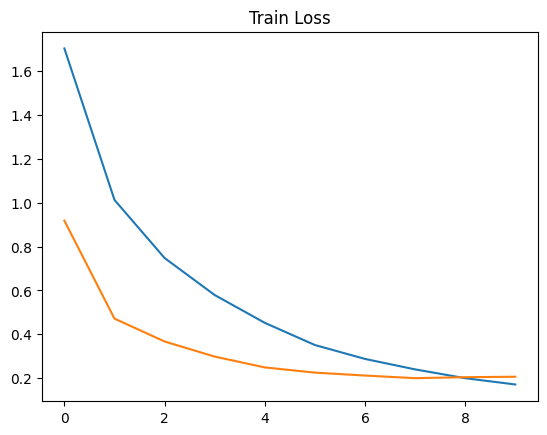

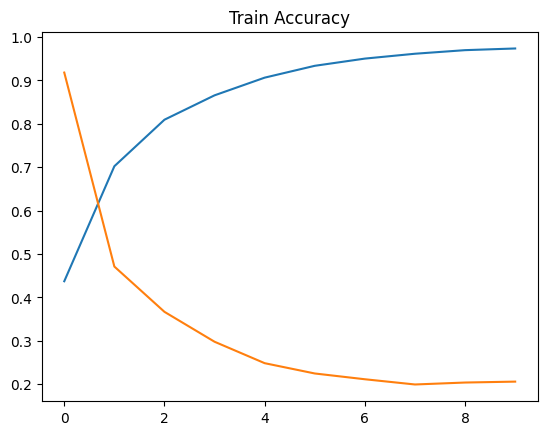

In [59]:
h = history

# Plot the loss value
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.title('Train Loss')
plt.show()

# Plot the accuracy value
plt.plot(h.history['acc'])
plt.title('Train Accuracy')
plt.plot(h.history['val_loss'])
plt.show()